In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
print("Project root added to sys.path")

Project root added to sys.path


In [2]:
import torch
from utils.data_loader import load_dataset
from utils.data_partition import iid_partition, non_iid_partition, dirichlet_partition, quantity_skew_partition, temporal_partition, hybrid_partition
from models.config import get_tinyprop_config
from clients.federated_training import federated_training
from clients.aggregators import sparse_fedavg_aggregate
from utils.save_results import save_training_logs_csv
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\la7tim\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [11]:
trainset, testset = load_dataset("mnist")
num_clients = 5
partitions = {
    "iid":            iid_partition(trainset, num_clients),
    "non_iid":        non_iid_partition(trainset, num_clients=num_clients, num_shards=10),
    "dirichlet":      dirichlet_partition(trainset, num_clients=num_clients, alpha=0.5),
    "quantity_skew":  quantity_skew_partition(trainset, num_clients=num_clients),
    "temporal":       temporal_partition(trainset, num_clients=num_clients),
    "hybrid":         hybrid_partition(trainset, num_clients=num_clients, alpha=0.5),
}

[INFO] Loaded dataset 'mnist' with 60000 training samples and 10000 testing samples.


In [12]:


results_dir = "mnist_logs"
os.makedirs(results_dir, exist_ok=True)

for strategy_name, client_datasets in partitions.items():
    print(f"\n Training on partition: {strategy_name.upper()}")

    json_log_path = os.path.join(results_dir, f"{strategy_name}.json")
    csv_log_path  = os.path.join(results_dir, f"{strategy_name}.csv")

    model, acc, flops, mem, comm, sparsity, grad_norm, phi, skipped, eff_ratio, client_eval, compression = federated_training(
        client_datasets=client_datasets,
        model_name="mnist",
        testset=testset,
        tinyprop_params=get_tinyprop_config("mnist")["tinyprop_params"],
        aggregator_fn=sparse_fedavg_aggregate,
        device="cuda" if torch.cuda.is_available() else "cpu",
        rounds=100,
        local_epochs=1,
        early_stopping_patience=10,
        early_stopping_delta=0.0001,
        warmup_rounds=0,
        json_log_path=json_log_path
    )

    save_training_logs_csv(csv_log_path, acc, flops, mem, comm, sparsity)



 Training on partition: IID

Round 1/100
Test Accuracy: 0.8395
[Compute] round_flops=241638551.04, [Mem] peak=6148688.0 bytes, [Comm] 60596528.0 bytes, [Sparsity] 93.18%

Round 2/100
Test Accuracy: 0.9763
[Compute] round_flops=140242945.51, [Mem] peak=2688016.0 bytes, [Comm] 24468392.0 bytes, [Sparsity] 37.62%

Round 3/100
Test Accuracy: 0.9818
[Compute] round_flops=90231490.28, [Mem] peak=2143808.0 bytes, [Comm] 21063064.0 bytes, [Sparsity] 32.39%

Round 4/100
Test Accuracy: 0.9847
[Compute] round_flops=70294097.31, [Mem] peak=2032732.0 bytes, [Comm] 20008256.0 bytes, [Sparsity] 30.77%

Round 5/100
Test Accuracy: 0.9861
[Compute] round_flops=58061513.31, [Mem] peak=1988552.0 bytes, [Comm] 19465192.0 bytes, [Sparsity] 29.93%

Round 6/100
Test Accuracy: 0.9870
[Compute] round_flops=50223597.35, [Mem] peak=1963580.0 bytes, [Comm] 19049864.0 bytes, [Sparsity] 29.29%

Round 7/100
Test Accuracy: 0.9873
[Compute] round_flops=45382907.08, [Mem] peak=1917536.0 bytes, [Comm] 18813032.0 bytes, 

RuntimeError: selected index k out of range

In [3]:
trainset, testset = load_dataset("mnist")
num_clients = 5
partitions = {
    "quantity_skew":  quantity_skew_partition(trainset, num_clients=num_clients),
    "temporal":       temporal_partition(trainset, num_clients=num_clients),
    "hybrid":         hybrid_partition(trainset, num_clients=num_clients, alpha=0.5),
}

[INFO] Loaded dataset 'mnist' with 60000 training samples and 10000 testing samples.


c:\Users\la7tim\Desktop\Internship\FedTinyProp\utils\data_partition.py:37: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  labels = np.array(dataset.targets)


In [4]:


results_dir = "mnist_logs"
os.makedirs(results_dir, exist_ok=True)

for strategy_name, client_datasets in partitions.items():
    print(f"\n Training on partition: {strategy_name.upper()}")

    json_log_path = os.path.join(results_dir, f"{strategy_name}.json")
    csv_log_path  = os.path.join(results_dir, f"{strategy_name}.csv")

    model, acc, flops, mem, comm, sparsity, grad_norm, phi, skipped, eff_ratio, client_eval, compression = federated_training(
        client_datasets=client_datasets,
        model_name="mnist",
        testset=testset,
        tinyprop_params=get_tinyprop_config("mnist")["tinyprop_params"],
        aggregator_fn=sparse_fedavg_aggregate,
        device="cuda" if torch.cuda.is_available() else "cpu",
        rounds=100,
        local_epochs=1,
        early_stopping_patience=10,
        early_stopping_delta=0.0001,
        warmup_rounds=0,
        json_log_path=json_log_path
    )

    save_training_logs_csv(csv_log_path, acc, flops, mem, comm, sparsity)



 Training on partition: QUANTITY_SKEW

Round 1/100
Test Accuracy: 0.7875
[Compute] round_flops=277514930.81, [Mem] peak=6267288.0 bytes, [Comm] 60921552.0 bytes, [Sparsity] 93.68%

Round 2/100
Test Accuracy: 0.9747
[Compute] round_flops=130943126.12, [Mem] peak=3095212.0 bytes, [Comm] 29357272.0 bytes, [Sparsity] 45.14%

Round 3/100
Test Accuracy: 0.9836
[Compute] round_flops=83548623.55, [Mem] peak=2452180.0 bytes, [Comm] 23807168.0 bytes, [Sparsity] 36.61%

Round 4/100
Test Accuracy: 0.9810
[Compute] round_flops=64522595.52, [Mem] peak=2436216.0 bytes, [Comm] 22955288.0 bytes, [Sparsity] 35.30%

Round 5/100
Test Accuracy: 0.9858
[Compute] round_flops=49379715.09, [Mem] peak=2301144.0 bytes, [Comm] 21642544.0 bytes, [Sparsity] 33.28%

Round 6/100
Test Accuracy: 0.9870
[Compute] round_flops=43666006.82, [Mem] peak=2313784.0 bytes, [Comm] 21540336.0 bytes, [Sparsity] 33.12%

Round 7/100
Test Accuracy: 0.9862
[Compute] round_flops=38343371.69, [Mem] peak=2220292.0 bytes, [Comm] 21093592

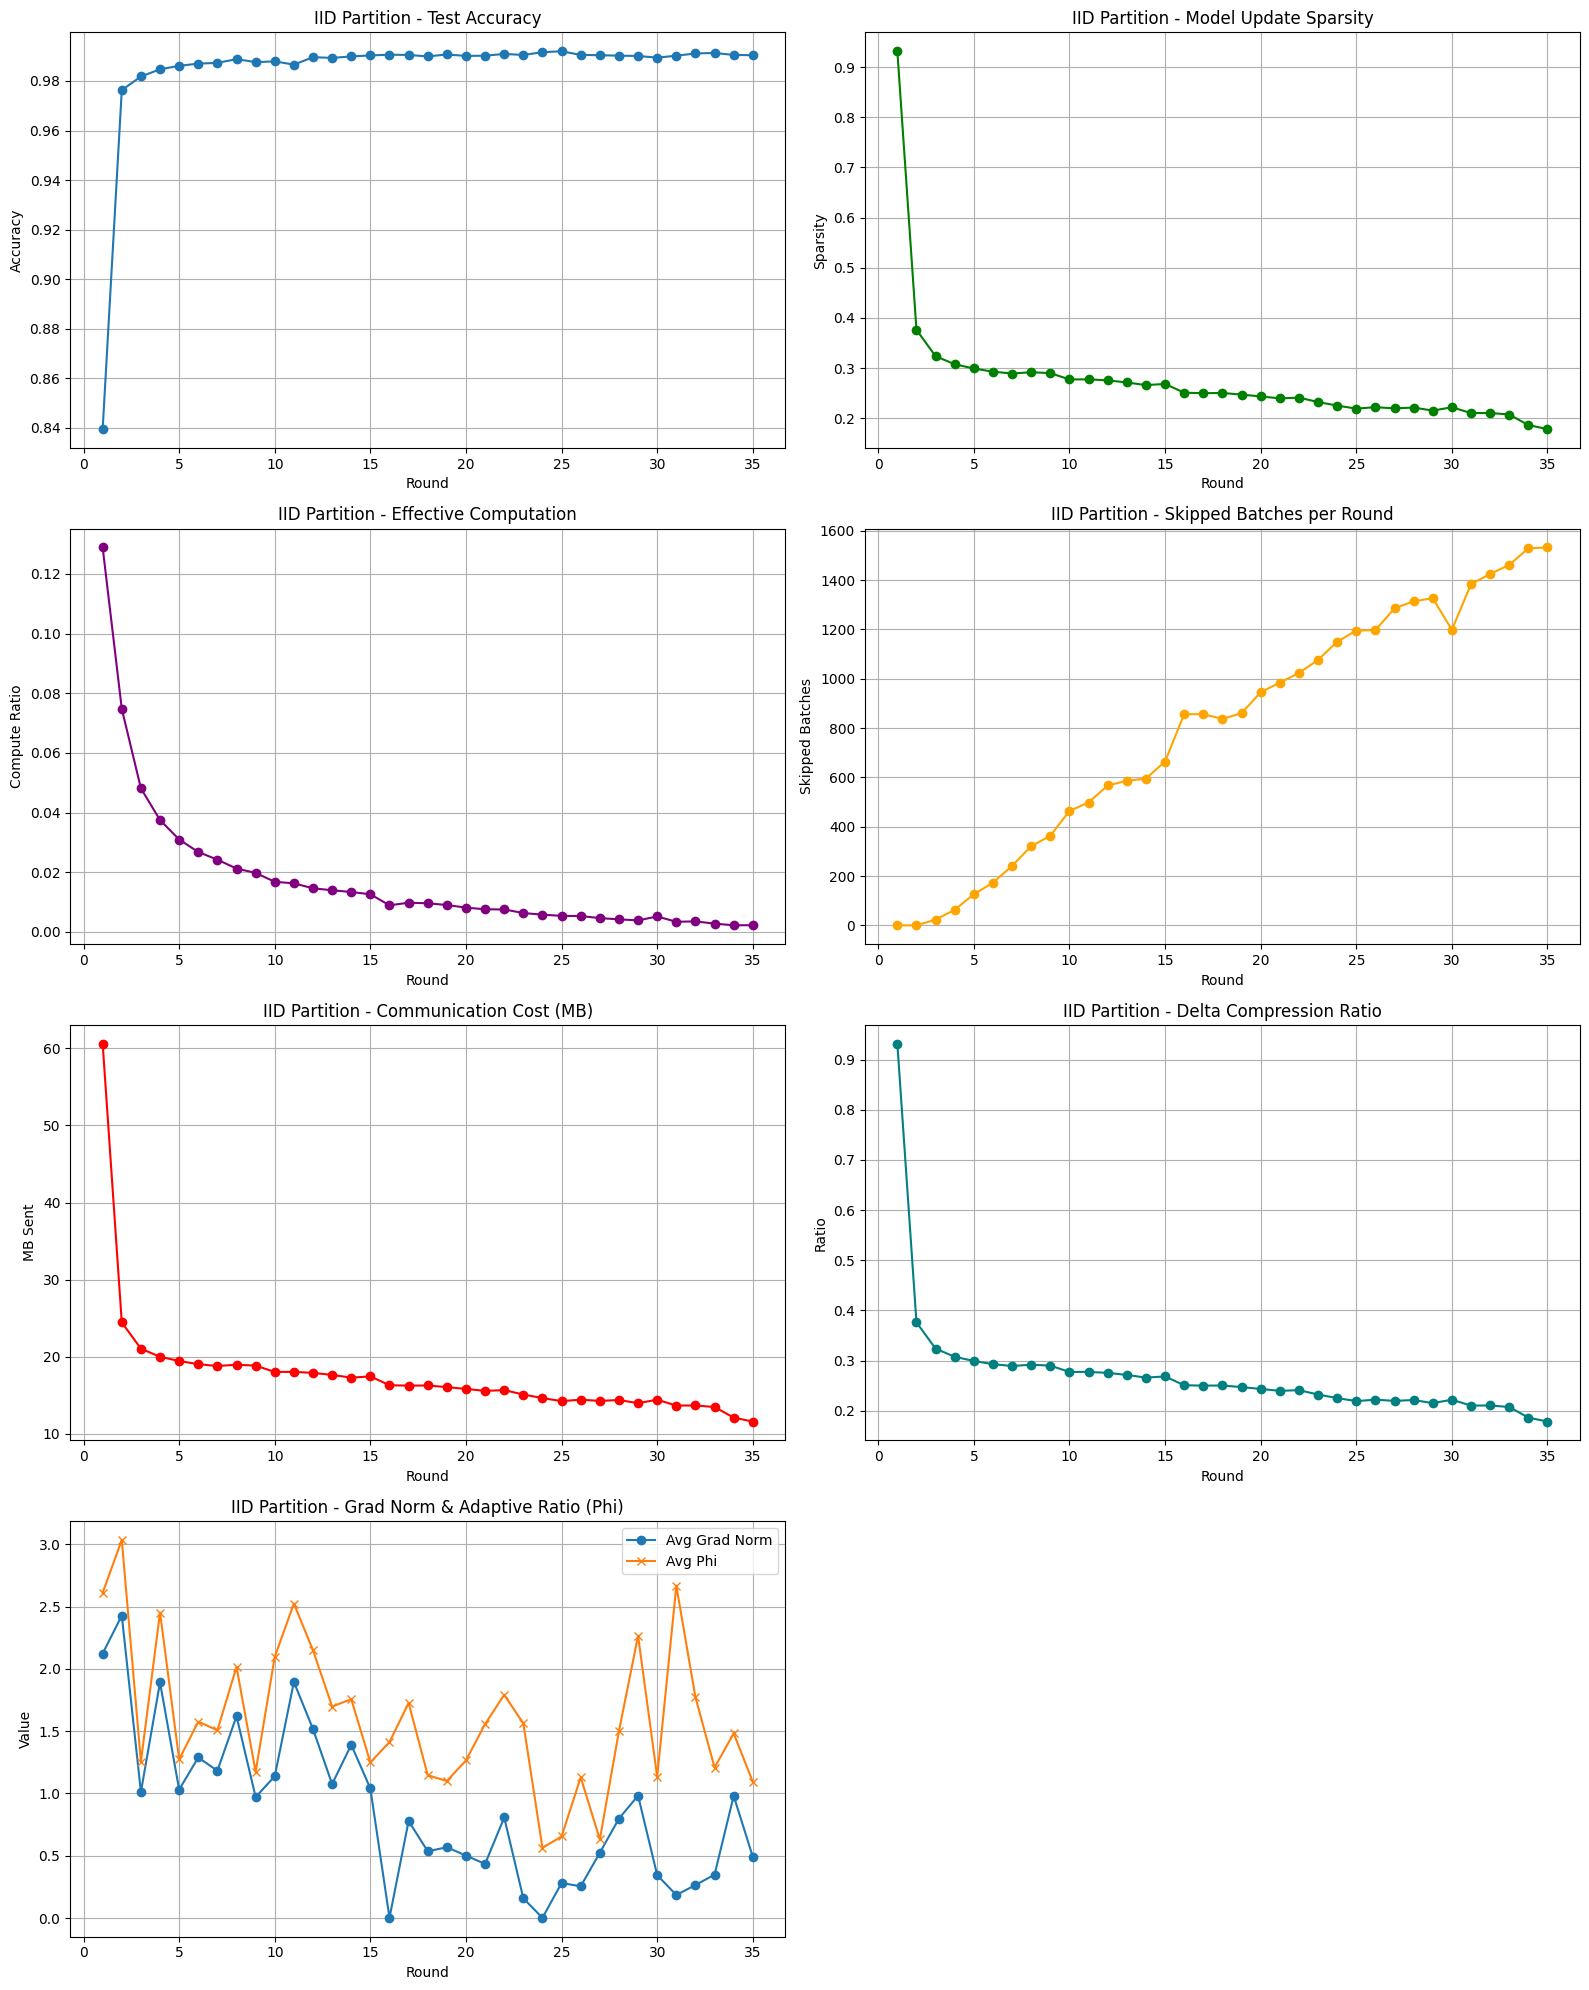

In [5]:
from utils.performance_visualizations import plot_fedtinyprop_metrics
plot_fedtinyprop_metrics("mnist_logs/iid.csv", title_prefix="IID Partition")


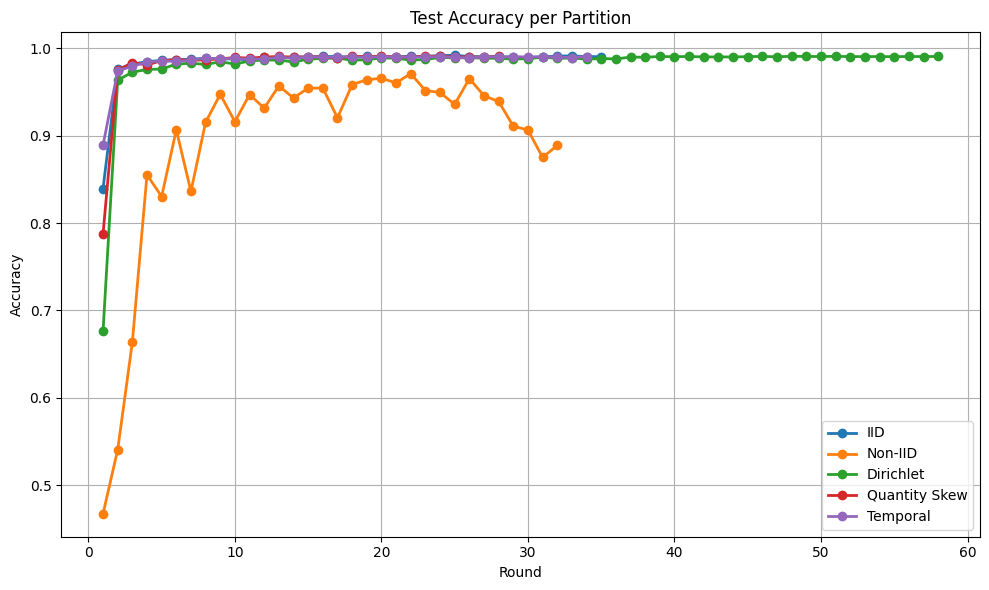

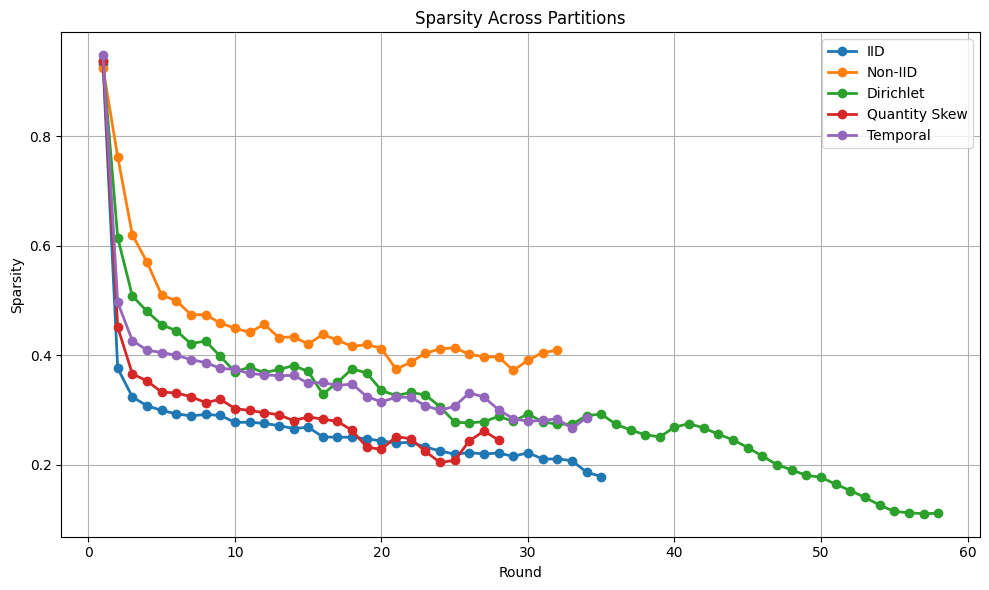

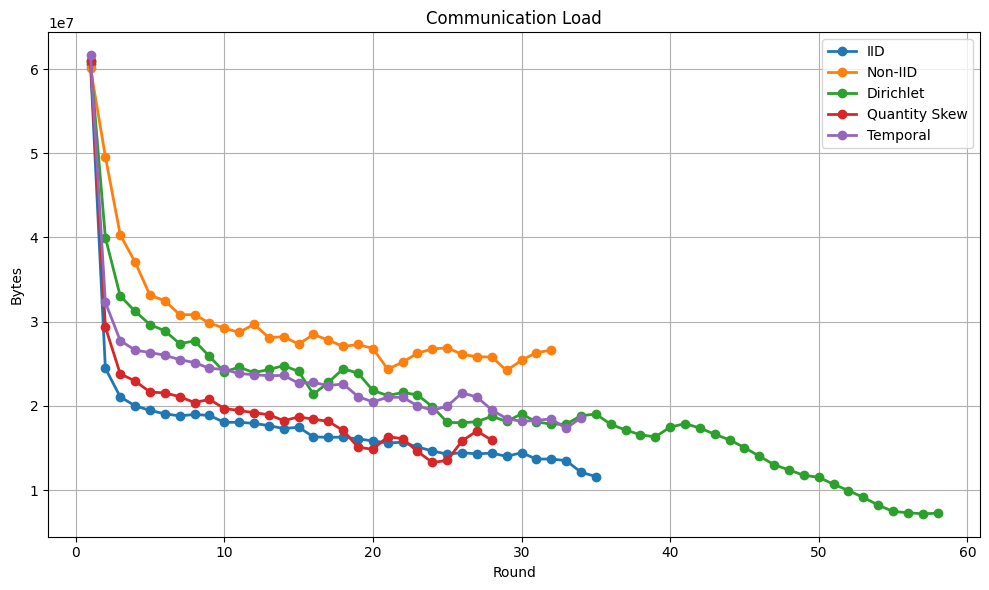

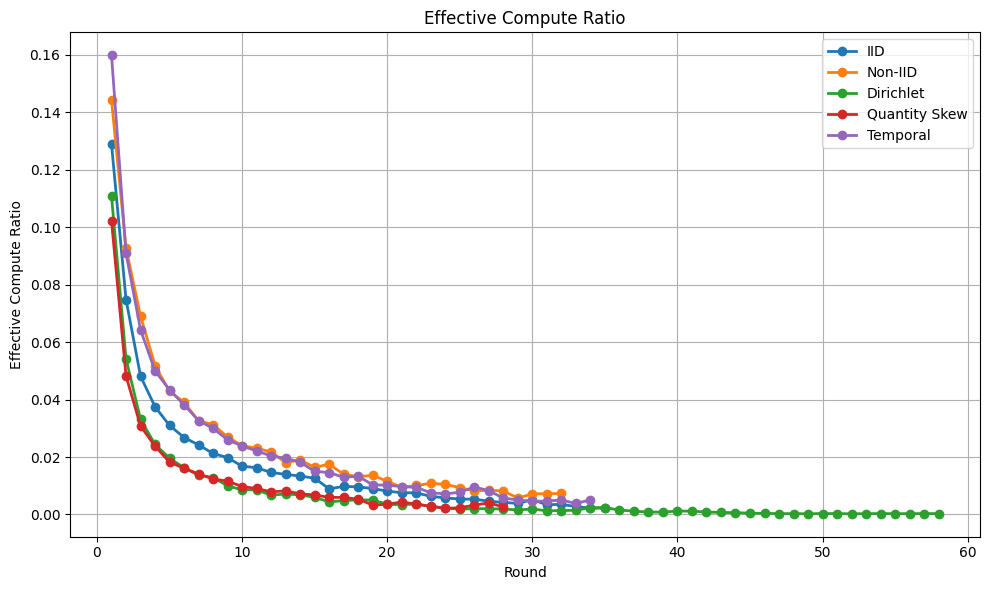

In [2]:
from utils.performance_visualizations import plot_metric_comparison_across_partitions
csv_paths = {
    "IID": "mnist_logs/iid.csv",
    "Non-IID": "mnist_logs/non_iid.csv",
    "Dirichlet": "mnist_logs/dirichlet.csv",
    "Quantity Skew": "mnist_logs/quantity_skew.csv",
    "Temporal": "mnist_logs/temporal.csv"
}

plot_metric_comparison_across_partitions(csv_paths, metric="accuracy", title="Test Accuracy per Partition")
plot_metric_comparison_across_partitions(csv_paths, metric="sparsity", title="Sparsity Across Partitions")
plot_metric_comparison_across_partitions(csv_paths, metric="communication_bytes", title="Communication Load", ylabel="Bytes")
plot_metric_comparison_across_partitions(csv_paths, metric="effective_compute_ratio", title="Effective Compute Ratio")
